# Auto ML (Классификация)

Проведите классификацию с помощью  Auto ML. Качество оценить минимум по 3 критериям качества для классификации: *confusion_matrix, accuracy, precision, recall, f1_score, roc_auc*.

**Dataset Description:**

- age : возраст (разница в 5 лет)
- height(cm) : рост (см)
- weight(kg) : вес (кг)
- waist(cm) : длина окружности талии (см)
- eyesight(left) : зрение (слева)
- eyesight(right) : зрение (справа)
- hearing(left) : слух (слева)
- hearing(right) : слух (справа)
- systolic : давление в артериях при сокращении сердца
- relaxation : давление в артериях при расслаблении
- fasting blood sugar : уровень сахара в крови натощак
- Cholesterol : общий уровень холестерина
- triglyceride : это тип жира, называемого липидами, который циркулирует в крови
- HDL : холестерин ЛПВП (липопротеины высокой плотности), иногда называемый «хорошим» холестерином, поглощает холестерин в крови и переносит его обратно в печень
- LDL : холестерин ЛПНП (липопротеины низкой плотности), иногда называемый «плохим» холестерином, составляет большую часть холестерина в вашем организме. Высокий уровень холестерина ЛПНП повышает риск сердечных заболеваний и инсульта
- hemoglobin : гемоглобин, белок, содержащийся в эритроцитах, который отвечает за доставку кислорода к тканям
- Urine protein : анализ на белок в моче измеряет белок в моче (моче), и большое его количество указывает на проблемы с почками.
- serum creatinine : продукт жизнедеятельности, вырабатываемый мышцами и отфильтровываемый почками. Большое его количество указывает на проблемы с почками
- AST : тип глутаминово-щавелево-уксусной трансаминазы. Слишком большое количество указывает на повреждение печени
- ALT : тип глутаминово-щавелево-уксусной трансаминазы. повышенный уровень АЛТ часто является признаком заболевания печени.
- Gtp : γ-GTP. Гамма-глютамилтранспептидаза – фермент (белок) печени и поджелудочной железы, активность которого в крови повышается при заболеваниях печени и злоупотреблении алкоголем.
- dental caries : кариес
- smoking : целевая переменная - курение

## Импортируем данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            confusion_matrix, precision_score, recall_score, \
                            roc_curve, f1_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# AutoML инструменты
import h2o
from h2o.automl import H2OAutoML
from h2o import save_model


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
data = pd.read_csv('train_dataset.csv')
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

## Проведем EDA (Exploratory Data Analysis) - первичный анализ данных

Все данные в нашем датасете имеют числовое значение.

In [4]:
def eda_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )

    return x

In [5]:
col_num = data.select_dtypes(include=["number"]).columns
eda_info(data[col_num])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
age,0.0,20.0,85.0,44.127591,40.0,145.529573,30.0,60.0,40.0,55.0
height(cm),0.0,130.0,190.0,164.689488,165.0,84.410288,150.0,175.0,160.0,170.0
weight(kg),0.0,30.0,135.0,65.938718,65.0,166.321797,50.0,85.0,55.0,75.0
waist(cm),0.0,51.0,129.0,82.062115,82.0,86.989160,70.0,94.0,76.0,88.0
eyesight(left),0.0,0.1,9.9,1.014955,1.0,0.248529,0.6,1.5,0.8,1.2
eyesight(right),0.0,0.1,9.9,1.008768,1.0,0.243851,0.6,1.5,0.8,1.2
hearing(left),0.0,1.0,2.0,1.025369,1.0,0.024726,1.0,1.0,1.0,1.0
hearing(right),0.0,1.0,2.0,1.026190,1.0,0.025505,1.0,1.0,1.0,1.0
systolic,0.0,71.0,233.0,121.475631,120.0,186.145675,104.0,138.0,112.0,130.0
relaxation,0.0,40.0,146.0,75.994408,76.0,93.291147,64.0,88.0,70.0,82.0


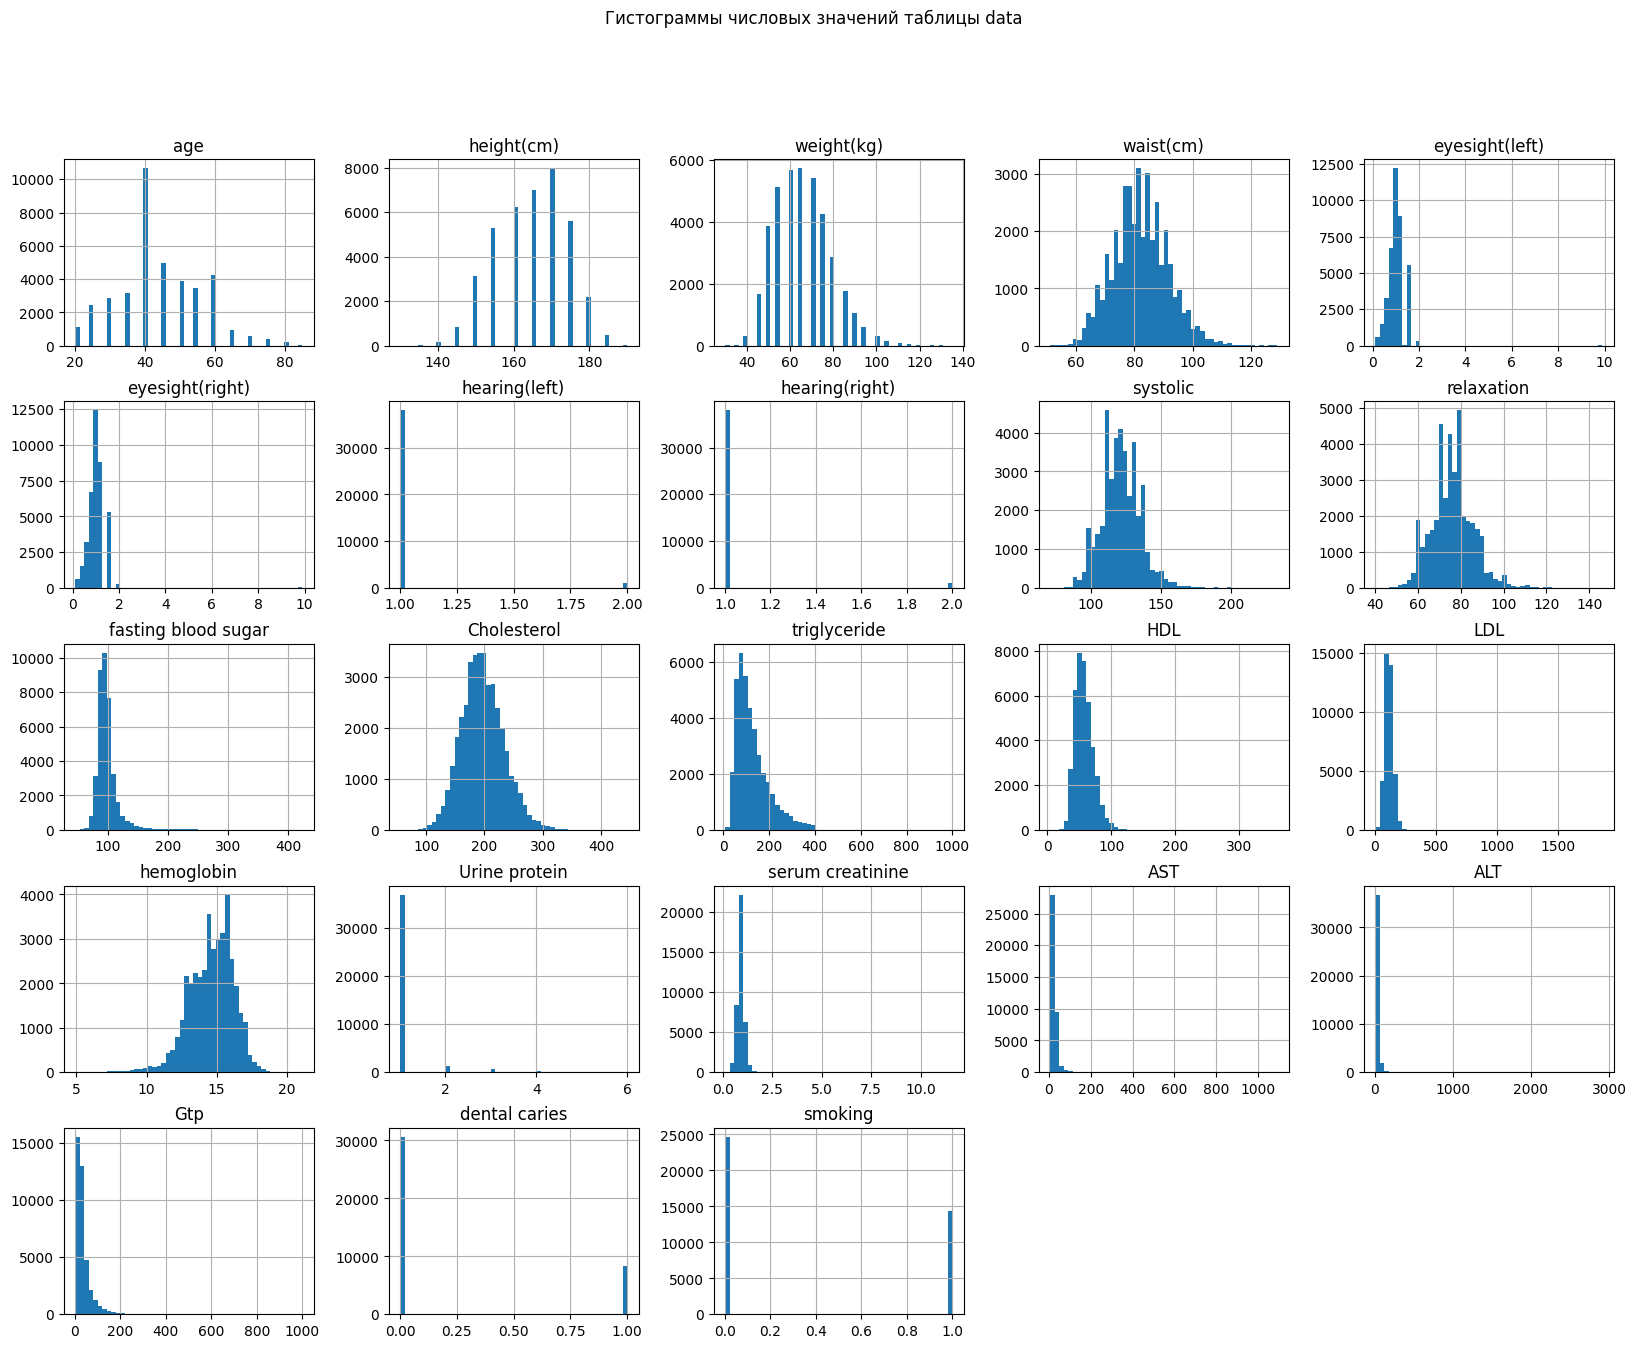

In [6]:
data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Гистограммы числовых значений таблицы data")
plt.show()

## Рассмотрим целевой признак `smoking`

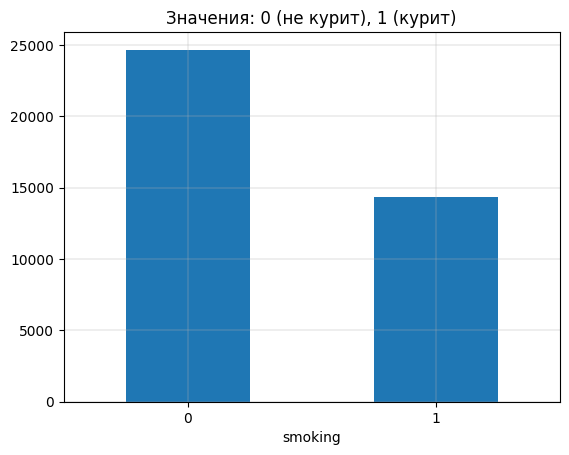

In [7]:
data['smoking'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Значения: 0 (не курит), 1 (курит)')
plt.show()

In [8]:
smoking_ratio = data['smoking'].mean()
print(f"Доля курящих (smoking = 1): {smoking_ratio:.2f}")

Доля курящих (smoking = 1): 0.37


Есть небольшой дисбаланс данных, учтем его в будущем при построении модели.

## Анализ данных

### Проверка на выбросы в данных

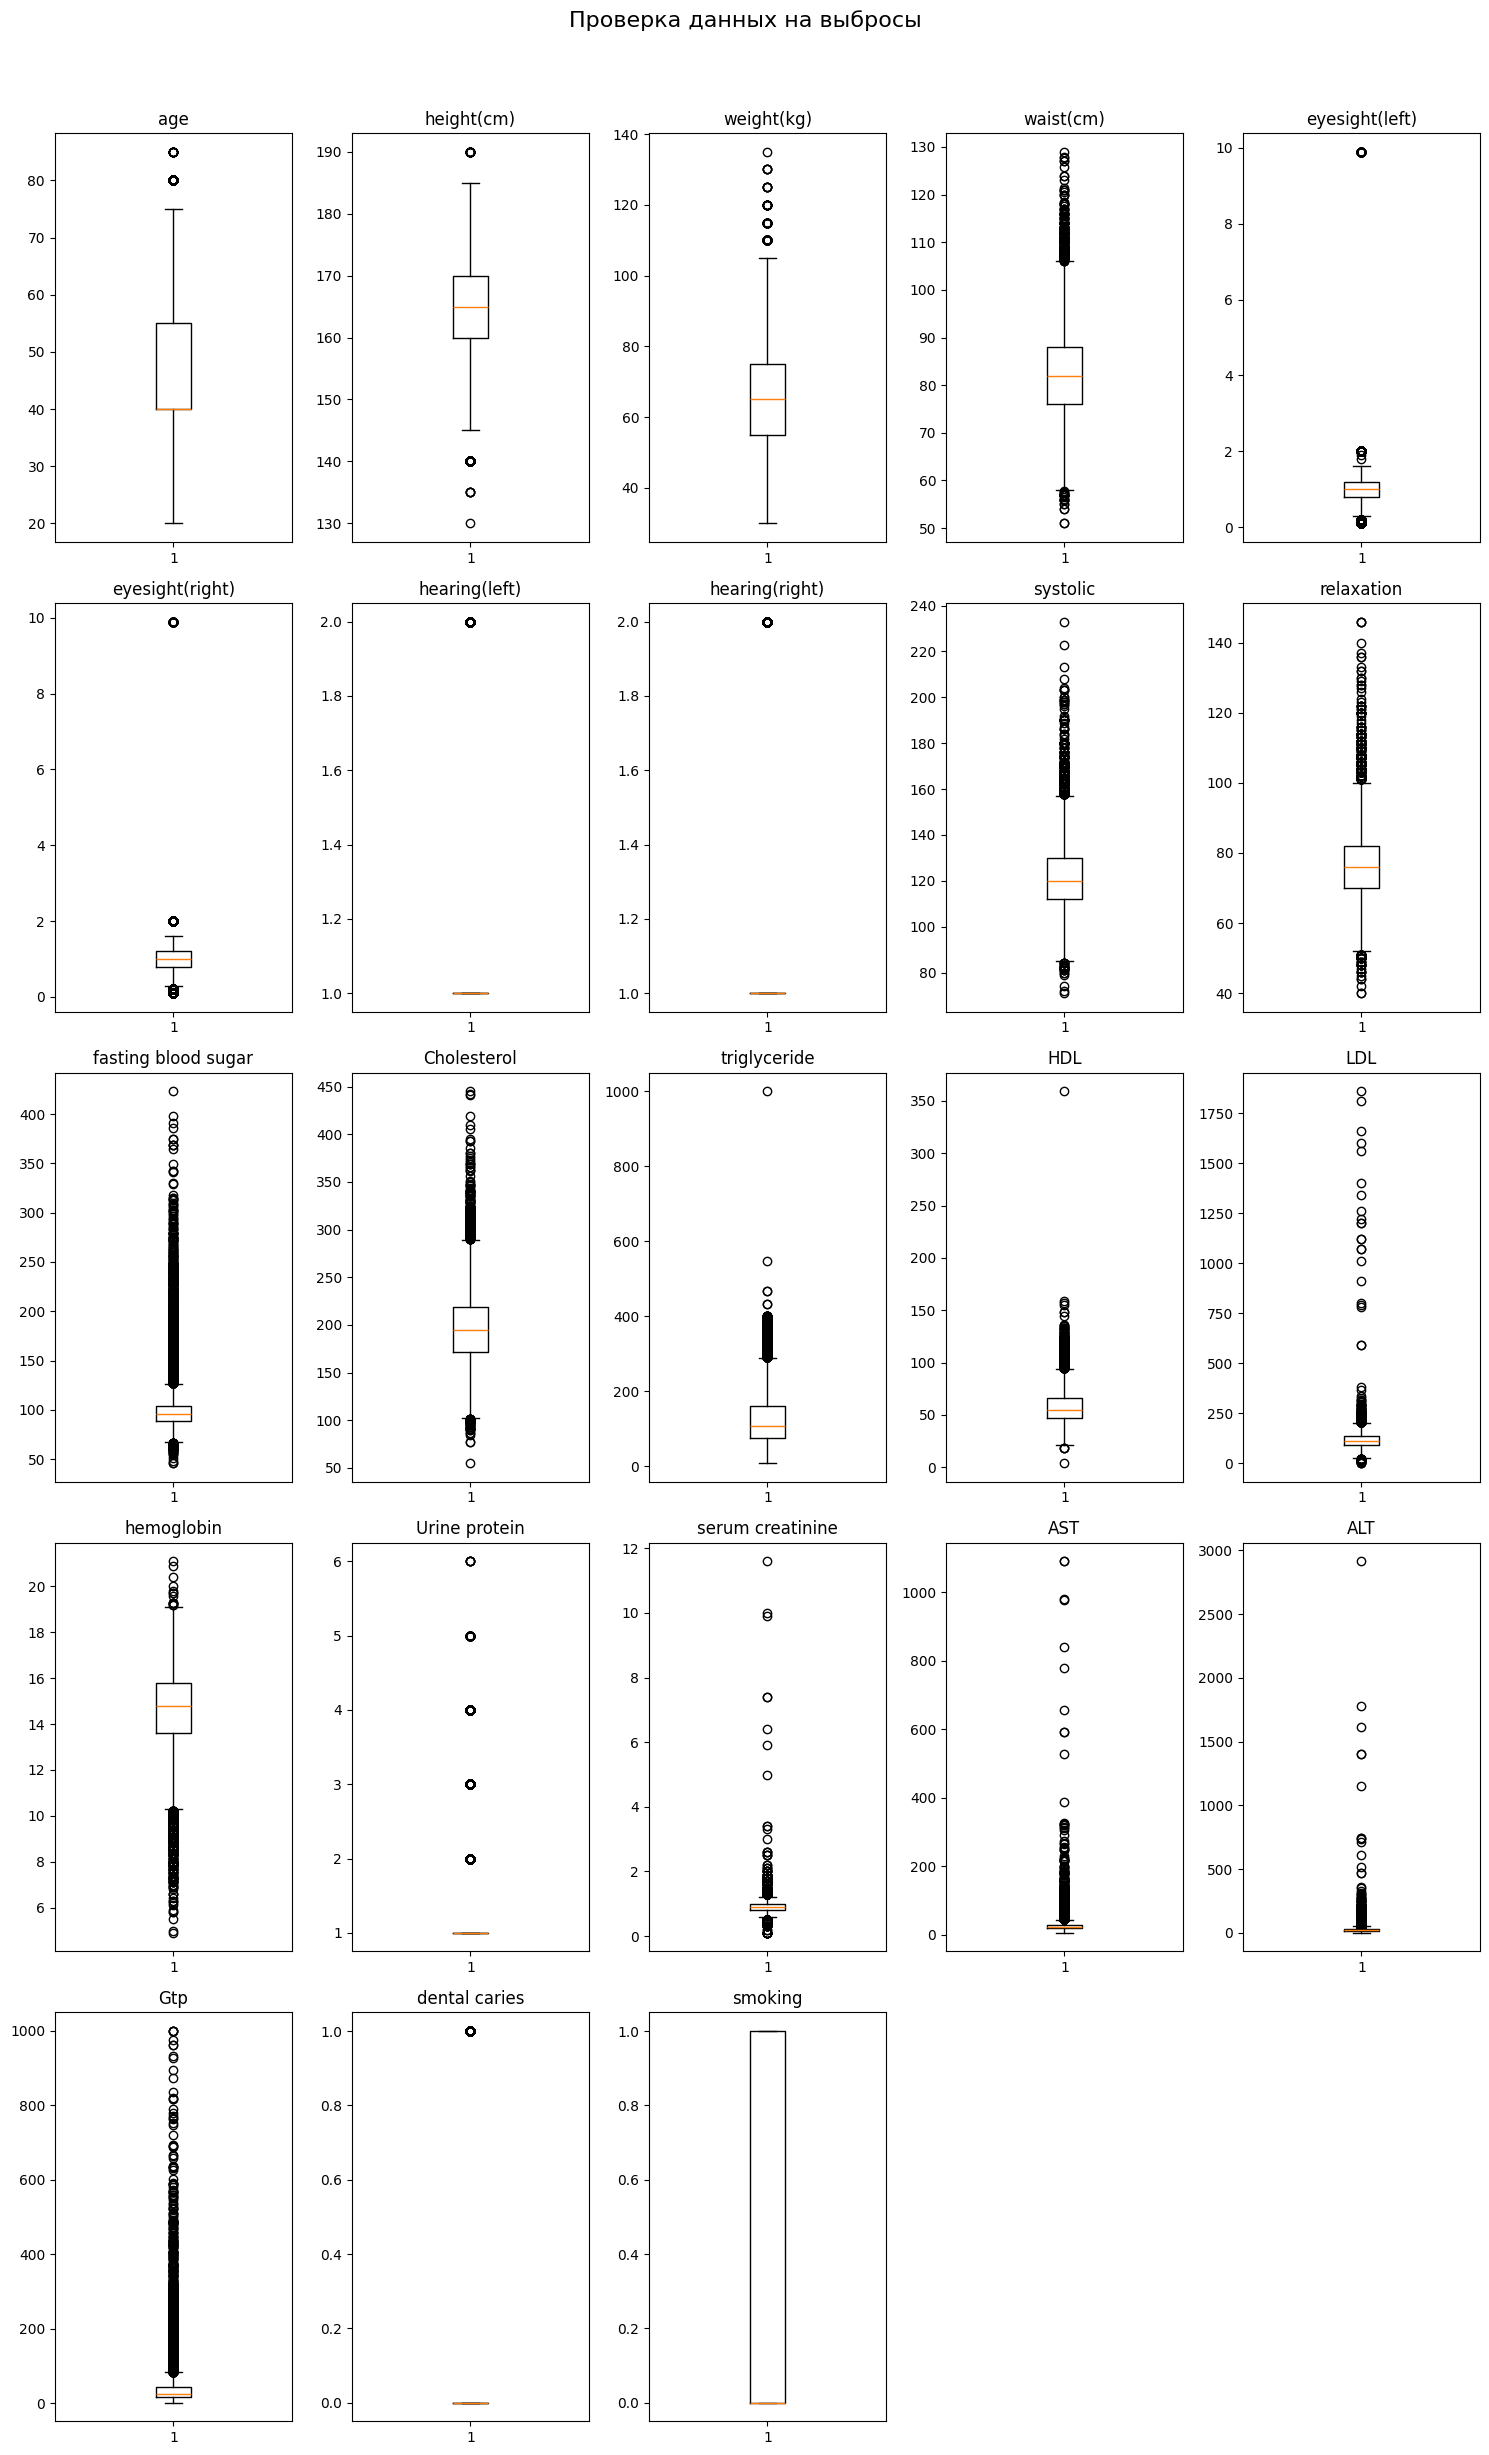

In [9]:
n = len(col_num)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col_num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

### Признаки относительно целевого признака

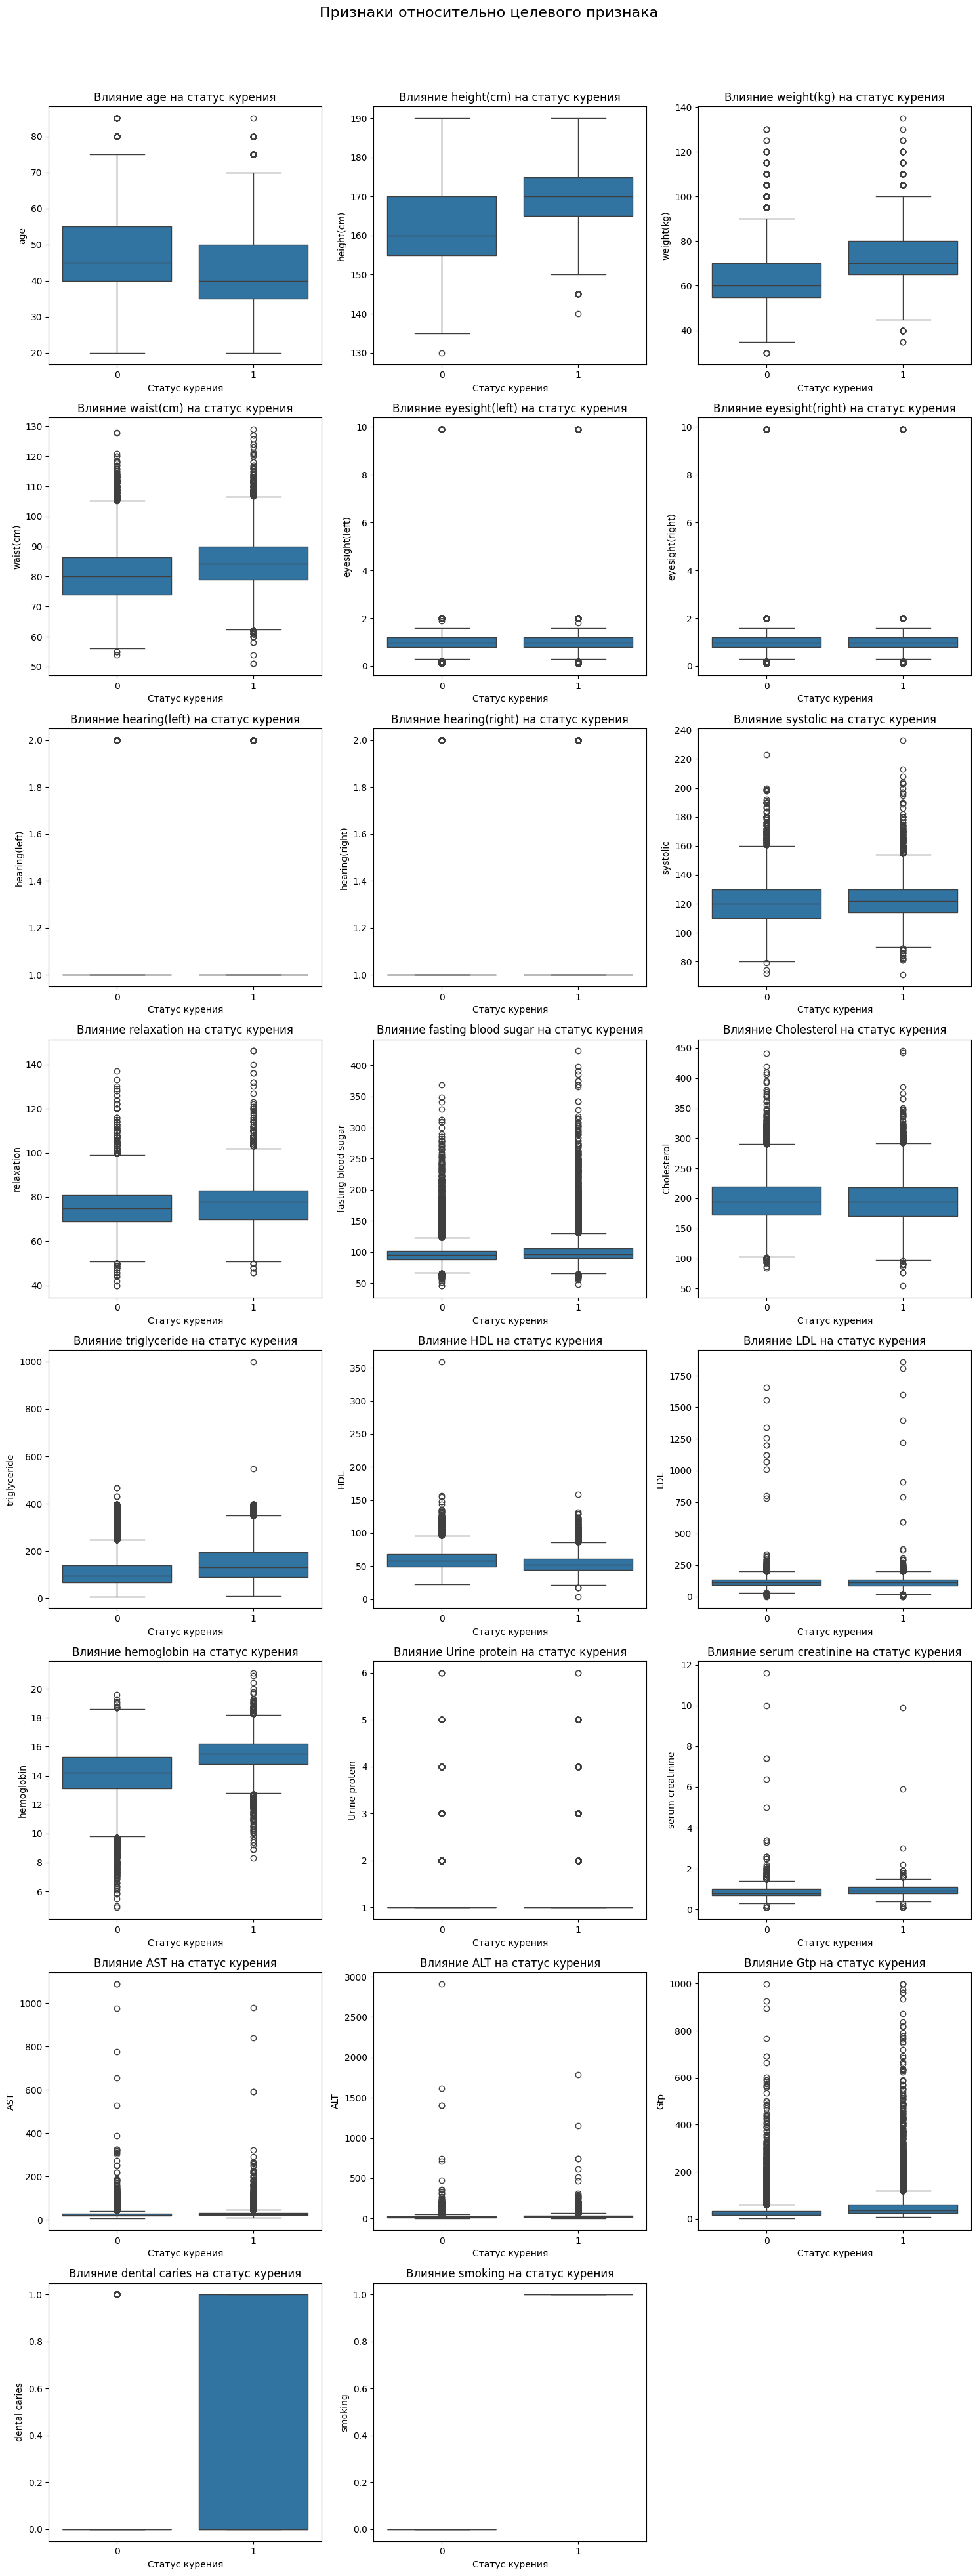

In [10]:
n = len(col_num)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, feature in enumerate(col_num):
    sns.boxplot(x='smoking', y=feature, data=data, ax=axes[i])  # Указываем ось для каждого графика
    axes[i].set_title(f'Влияние {feature} на статус курения')
    axes[i].set_xlabel('Статус курения')
    axes[i].set_ylabel(feature)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Признаки относительно целевого признака", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Видим, что в некоторых данных имеются выбросы. Пока их трогать не будем, посмотрим как с ними поведет себя модель.

### Построим матрицу корреляции

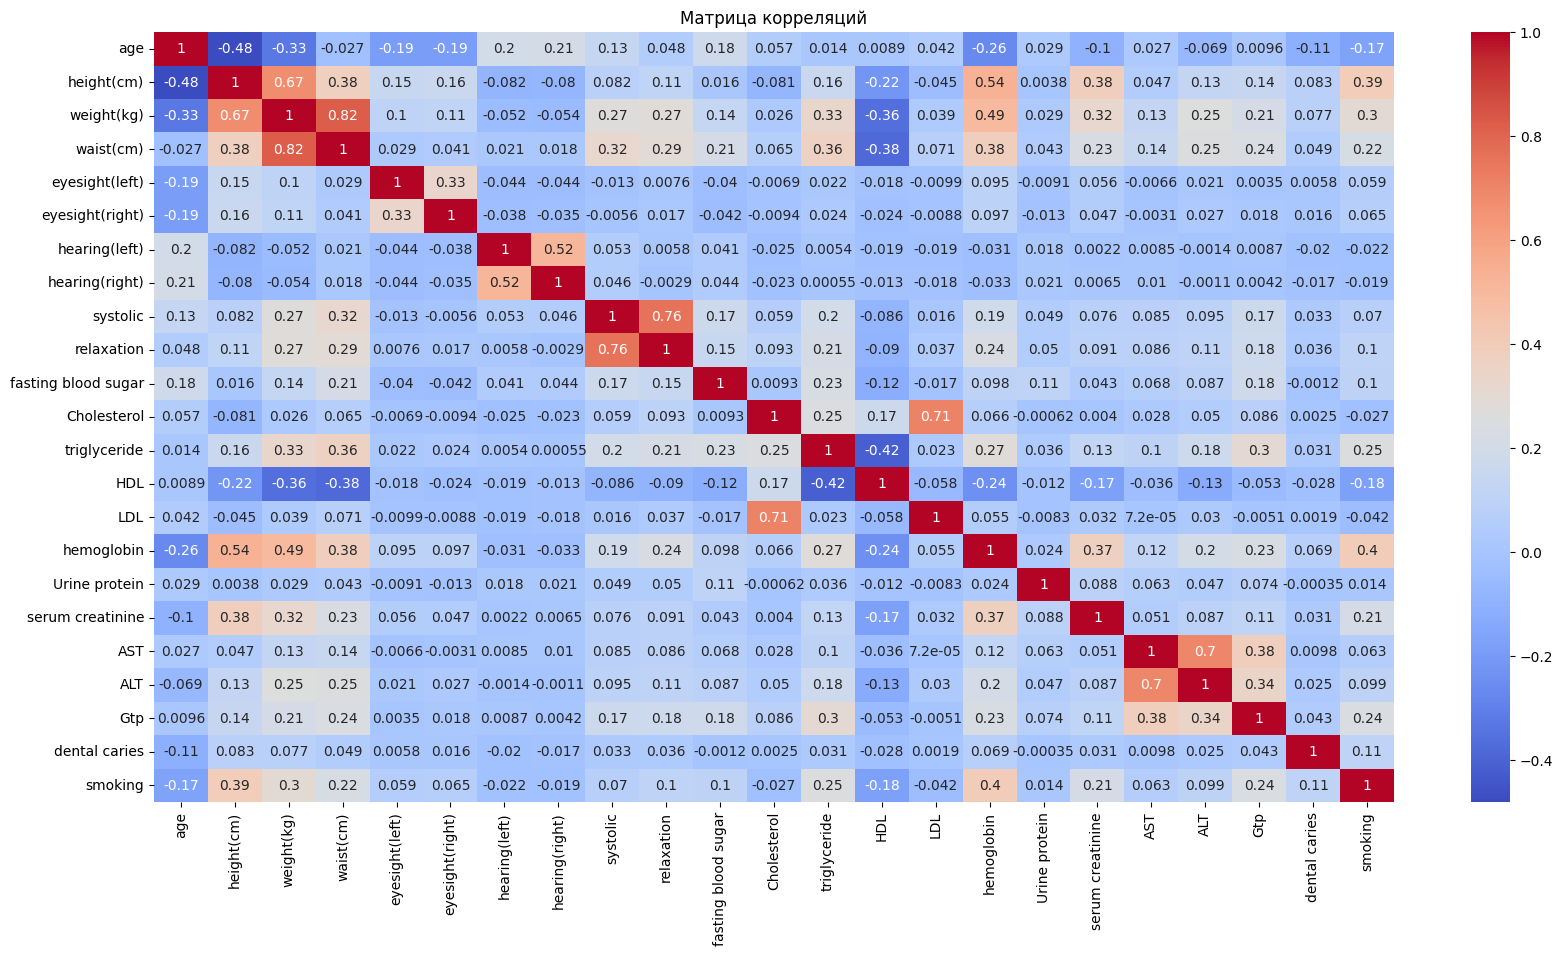

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим хорошую корреляцию между Cholesterol и LDL, relaxation и systolic, waist(cm) и weight(kg), AST и ALT.

## Подготовка данных к моделированию

### Поделим нашу таблицу на тренировочную и тестовую в соотношении 80/20

In [12]:
X = data.drop('smoking', axis=1)
y = data['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (31187, 22)
Размер тестовой выборки (признаки): (7797, 22)
Размер тренировочной выборки (целевой признак): (31187,)
Размер тестовой выборки (целевой признак): (7797,)


### Напишем функцию для подбора гиперпараметров и подсчета метрик

In [13]:
# Функция подбора гиперпараметров. Используем RandomizedSearchCV для скорости обучения
def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', n_iter=30):

    rand_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1, n_iter=n_iter, random_state=42)
    rand_search.fit(X_train, y_train)
    
    print(f"Лучшие гиперпараметры для {model}: {rand_search.best_params_}")
    
    return rand_search.best_estimator_

# Функция подсчета метрик
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred, average='weighted'), 3),
        "Recall": round(recall_score(y_test, y_pred, average='weighted'), 3),
        "F1 Score": round(f1_score(y_test, y_pred, average='weighted'), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_prob, multi_class='ovr'), 3) if y_prob is not None else None
    }
    
    return metrics, y_pred, y_prob

# Функция визуализации ROC кривой
def plot_roc_curve(y_test, y_prob, model):
    if y_prob is None:
        print(f"ROC curve not available for {model} (no probability estimates).")
        return
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve ({model})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model}')
    plt.legend()
    plt.show()

# Функция визуализации матрицы ошибок с нормализацией    
def plot_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model}')
    plt.show()

# Функция визуализации важности признаков    
def plot_feature_importance(model, X, model_name):
    if hasattr(model, "feature_importances_"):
        feature_imp = pd.DataFrame(
            sorted(zip(model.feature_importances_, X.columns)),
            columns=['Важность признака', 'Признак']
        )
        plt.figure(figsize=(10, 10))
        sns.barplot(x="Важность признака", y="Признак", data=feature_imp.sort_values(by="Важность признака", ascending=False))
        plt.title(f'Важность признака для {model_name}')
        plt.tight_layout()
        plt.grid()
        plt.show()
    else:
        print("Модель не поддерживает feature_importances_")

## RandomForestClassifier

In [14]:
%%time

param_grid_rf = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None] + [i for i in range(1, 21, 5)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.01, 0.03, 0.05],
    'n_estimators': [i for i in range(50, 201, 50)]
}

model_rf = RandomForestClassifier(random_state=42)     
best_model_rf = tune_hyperparameters(model_rf, param_grid_rf, X_train, y_train)
metrics_rf, y_pred_rf, y_prob_rf = evaluate_model(best_model_rf, X_test, y_test)

Лучшие гиперпараметры для RandomForestClassifier(random_state=42): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 11, 'criterion': 'entropy', 'ccp_alpha': 0.01}
CPU times: total: 2.81 s
Wall time: 1min 1s


In [15]:
# Подсчет метрик
df_metrics_rf = pd.DataFrame([metrics_rf])
df_metrics_rf

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.718,0.711,0.718,0.712,0.792


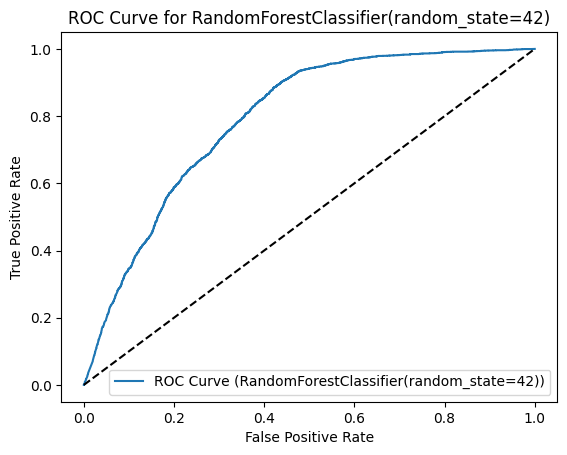

In [16]:
plot_roc_curve(y_test, y_prob_rf, model_rf)

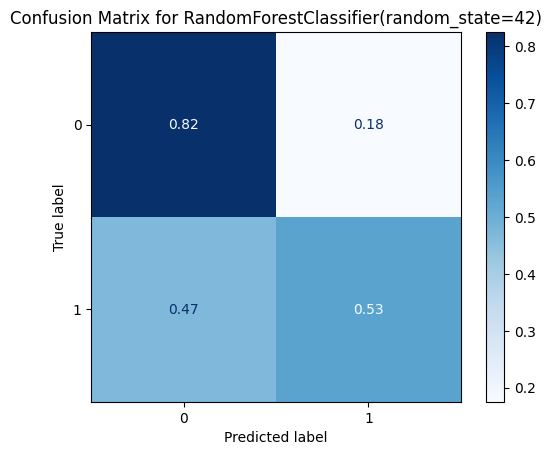

In [17]:
plot_confusion_matrix(y_test, y_pred_rf, model_rf)

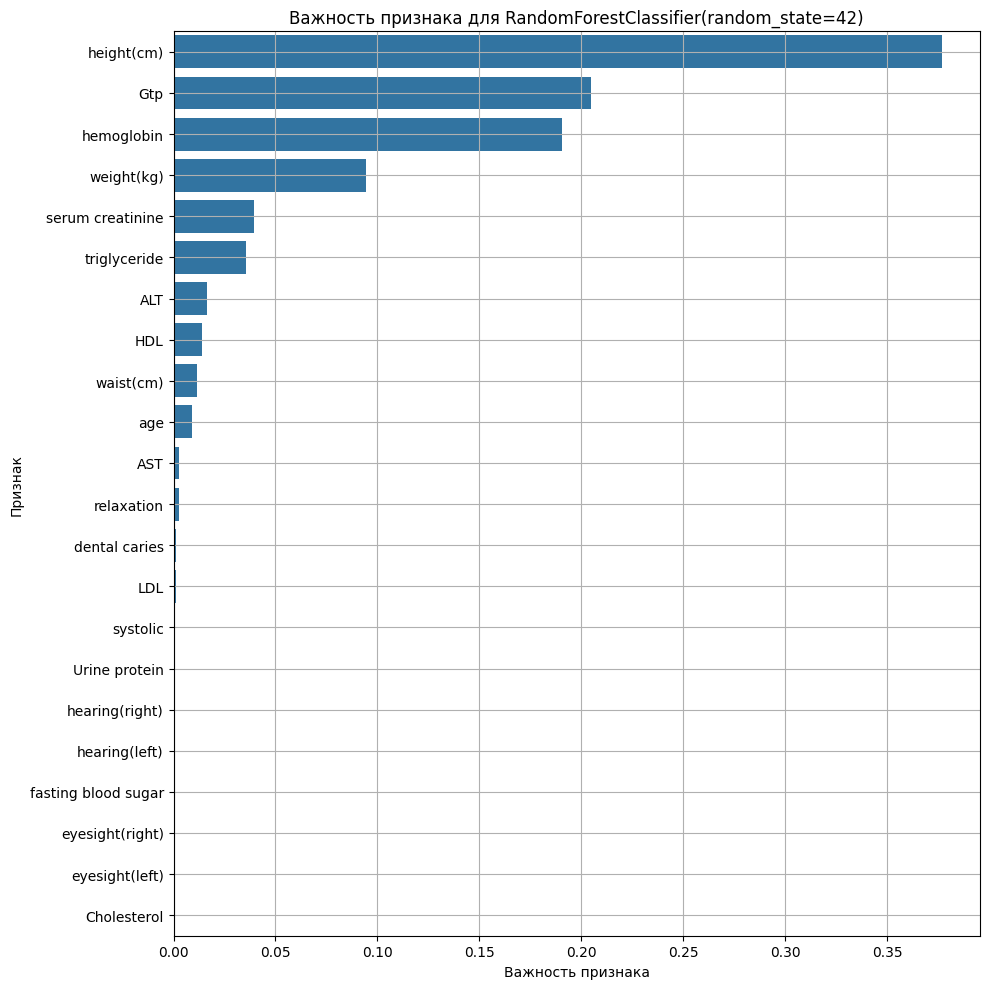

In [18]:
plot_feature_importance(best_model_rf, X_train, model_rf)

## XGBClassifier

In [19]:
%%time

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.25, 1.0]
}

model_xgb = XGBClassifier(random_state=42, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          eval_metric='mlogloss'
                        )     
best_model_xgb = tune_hyperparameters(model_xgb, param_grid_xgb, X_train, y_train)
metrics_xgb, y_pred_xgb, y_prob_xgb = evaluate_model(best_model_xgb, X_test, y_test)

Лучшие гиперпараметры для XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): {'n_estimators': 50, 'max_depth': 16, 'learning_rate': 0.1, 'gamma': 0.25}
CPU times: total: 17.2 s
Wall time: 1min 34s


In [20]:
# Подсчет метрик
df_metrics_xgb = pd.DataFrame([metrics_xgb])
df_metrics_xgb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.798,0.799,0.798,0.799,0.877


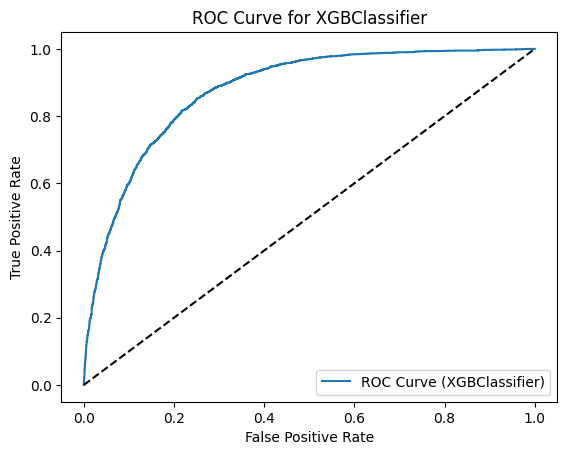

In [21]:
plot_roc_curve(y_test, y_prob_xgb, model='XGBClassifier')

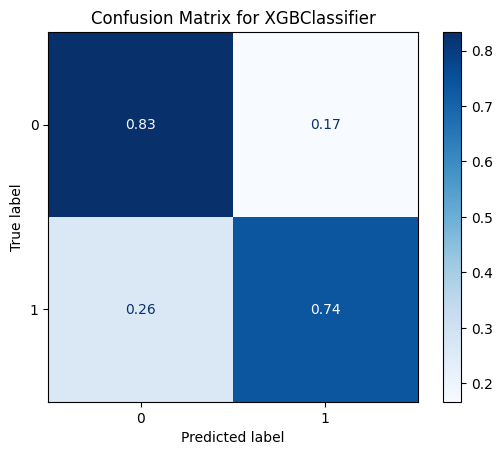

In [22]:
plot_confusion_matrix(y_test, y_pred_xgb, model='XGBClassifier')

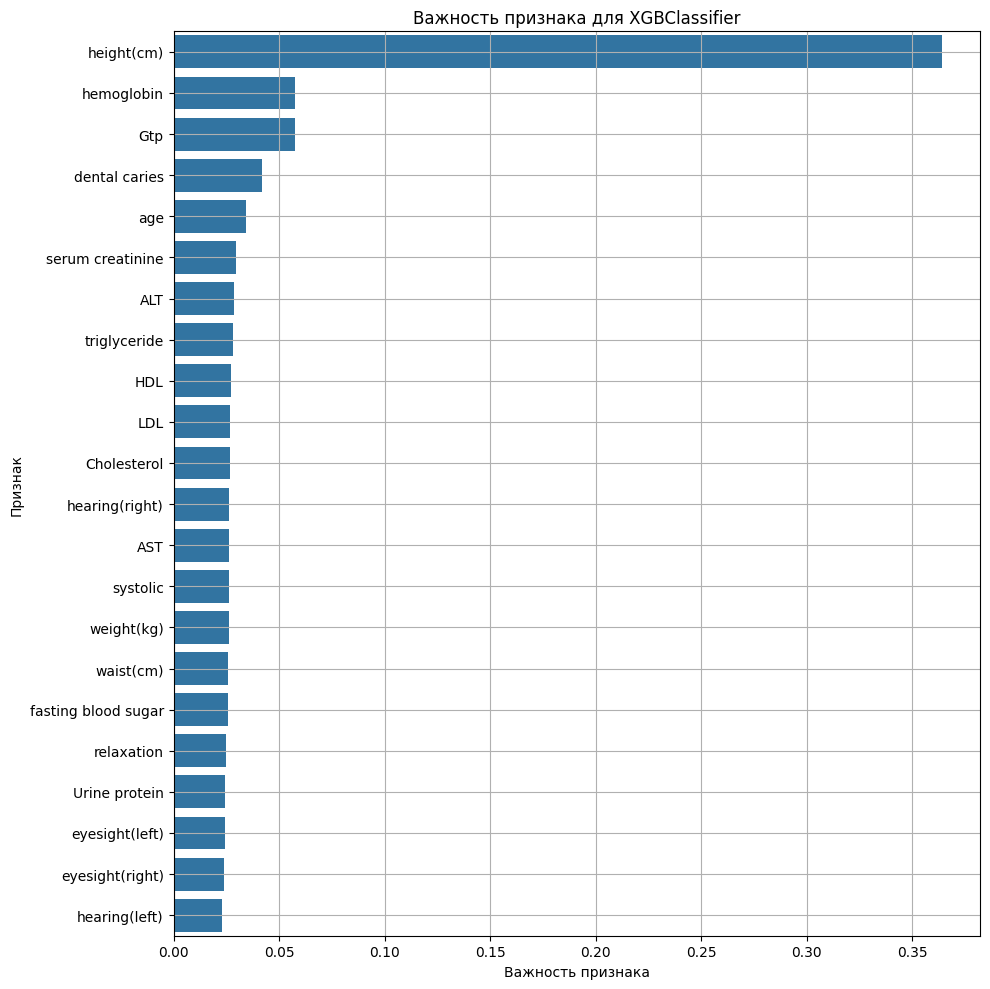

In [23]:
plot_feature_importance(best_model_xgb, X_train, model_name='XGBClassifier')

## Общая таблица полученных метрик качества

In [24]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(
    {'Метрики': [metrics_rf,
                 metrics_xgb]
    },
    index=['RandomForestClassifier', 
           'XGBClassifier']
)

,Метрики
RandomForestClassifier,"{'Accuracy': 0.718, 'Precision': 0.711, 'Recall': 0.718, 'F1 Score': 0.712, 'ROC AUC': 0.792}"
XGBClassifier,"{'Accuracy': 0.798, 'Precision': 0.799, 'Recall': 0.798, 'F1 Score': 0.799, 'ROC AUC': 0.877}"


Лучшая модель - `XGBClassifier` с метриками **{'Accuracy': 0.798, 'Precision': 0.8, 'Recall': 0.798, 'F1 Score': 0.799, 'ROC AUC': 0.877}** и гиперпараметрами: **{'n_estimators': 50, 'max_depth': 16, 'learning_rate': 0.1, 'gamma': 0.25}**. 

## Auto ML (H2O AutoML)

In [27]:
h2o.init()
df_h2o = h2o.import_file('train_dataset.csv')
df_h2o.head()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 23.0.1+11-39, mixed mode, sharing)
  Starting server from C:\Program Files\Python312\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\nizae\AppData\Local\Temp\tmpnyt1tzv_
  JVM stdout: C:\Users\nizae\AppData\Local\Temp\tmpnyt1tzv_\h2o_nizae_started_from_python.out
  JVM stderr: C:\Users\nizae\AppData\Local\Temp\tmpnyt1tzv_\h2o_nizae_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Samara
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_nizae_z9lhgk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.948 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
35,170,85,97,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1,61,115,125,1,1
20,175,110,110,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
45,155,65,86,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
45,165,80,94,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
20,165,60,81,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
60,160,50,78,1,0.9,2,2,126,75,114,177,74,98,64,13.9,1,1,47,23,70,0,1
40,175,90,95,0.9,1,1,1,130,88,90,207,331,39,102,16.5,1,1,19,22,19,0,0
40,180,75,85,1.5,1.5,1,1,110,60,100,170,62,58,99,14,2,1.4,29,20,32,1,1
40,170,60,74,1.2,1.5,1,1,89,57,83,178,69,60,104,12.9,2,0.7,17,17,14,0,0
45,155,55,78,0.7,1,1,1,114,81,96,184,177,41,107,13.1,1,0.6,22,15,56,0,0


In [28]:
type(df_h2o)

h2o.frame.H2OFrame

In [29]:
df_h2o.describe()

Rows:38984
Cols:23

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
type,int,int,int,real,real,real,int,int,int,int,int,int,int,int,int,real,int,real,int,int,int,int,int
mins,20.0,130.0,30.0,51.0,0.1,0.1,1.0,1.0,71.0,40.0,46.0,55.0,8.0,4.0,1.0,4.9,1.0,0.1,6.0,1.0,2.0,0.0,0.0
mean,44.12759080648471,164.6894879950749,65.9387184485943,82.0621152267597,1.0149548532731376,1.0087676995690538,1.0253693823106913,1.026190231890006,121.4756310281141,75.99440796224093,99.34226862302484,196.88349066283604,126.74946131746357,57.293145906012725,115.08149497229633,14.624263800533553,1.0865226759696285,0.8860301662220398,26.198235173404466,27.14518776934127,39.905037964293044,0.21442130104658322,0.3672788836445721
maxs,85.0,190.0,135.0,129.0,9.9,9.9,2.0,2.0,233.0,146.0,423.0,445.0,999.0,359.0,1860.0,21.1,6.0,11.6,1090.0,2914.0,999.0,1.0,1.0
sigma,12.06356388009679,9.187507163191672,12.896580811939499,9.326797968831222,0.4985272237562848,0.4938127088939538,0.15724633866204393,0.15970271721307625,13.643521357201498,9.658734230436004,20.642741442941805,36.35394457927984,71.80314269616821,14.617822368434979,42.88316342481715,1.5665275744418552,0.40210687898549,0.22062146975073924,19.17559546591539,31.309944988594502,49.693842567640246,0.4104255446304313,0.48206956600088297
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30625,24666
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,35.0,170.0,85.0,97.0,0.9,0.9,1.0,1.0,118.0,78.0,97.0,239.0,153.0,70.0,142.0,19.8,1.0,1.0,61.0,115.0,125.0,1.0,1.0
1,20.0,175.0,110.0,110.0,0.7,0.9,1.0,1.0,119.0,79.0,88.0,211.0,128.0,71.0,114.0,15.9,1.0,1.1,19.0,25.0,30.0,1.0,0.0
2,45.0,155.0,65.0,86.0,0.9,0.9,1.0,1.0,110.0,80.0,80.0,193.0,120.0,57.0,112.0,13.7,3.0,0.6,1090.0,1400.0,276.0,0.0,0.0


H2O AutoML автоматически определяет тип задачи (классификация или регрессия) по типу целевой переменной:

- Если она числовая (int/float) → будет регрессия.

- Если она категориальная (enum/factor) → будет классификация.

У нас задача классификации, поэтому поменяем int на enum.

In [30]:
df_h2o['smoking'] = df_h2o['smoking'].asfactor()

In [31]:
df_h2o.describe()

Rows:38984
Cols:23

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
type,int,int,int,real,real,real,int,int,int,int,int,int,int,int,int,real,int,real,int,int,int,int,enum
mins,20.0,130.0,30.0,51.0,0.1,0.1,1.0,1.0,71.0,40.0,46.0,55.0,8.0,4.0,1.0,4.9,1.0,0.1,6.0,1.0,2.0,0.0,
mean,44.12759080648471,164.6894879950749,65.9387184485943,82.0621152267597,1.0149548532731376,1.0087676995690538,1.0253693823106913,1.026190231890006,121.4756310281141,75.99440796224093,99.34226862302484,196.88349066283604,126.74946131746357,57.293145906012725,115.08149497229633,14.624263800533553,1.0865226759696285,0.8860301662220398,26.198235173404466,27.14518776934127,39.905037964293044,0.21442130104658322,
maxs,85.0,190.0,135.0,129.0,9.9,9.9,2.0,2.0,233.0,146.0,423.0,445.0,999.0,359.0,1860.0,21.1,6.0,11.6,1090.0,2914.0,999.0,1.0,
sigma,12.06356388009679,9.187507163191672,12.896580811939499,9.326797968831222,0.4985272237562848,0.4938127088939538,0.15724633866204393,0.15970271721307625,13.643521357201498,9.658734230436004,20.642741442941805,36.35394457927984,71.80314269616821,14.617822368434979,42.88316342481715,1.5665275744418552,0.40210687898549,0.22062146975073924,19.17559546591539,31.309944988594502,49.693842567640246,0.4104255446304313,
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30625,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,35.0,170.0,85.0,97.0,0.9,0.9,1.0,1.0,118.0,78.0,97.0,239.0,153.0,70.0,142.0,19.8,1.0,1.0,61.0,115.0,125.0,1.0,1
1,20.0,175.0,110.0,110.0,0.7,0.9,1.0,1.0,119.0,79.0,88.0,211.0,128.0,71.0,114.0,15.9,1.0,1.1,19.0,25.0,30.0,1.0,0
2,45.0,155.0,65.0,86.0,0.9,0.9,1.0,1.0,110.0,80.0,80.0,193.0,120.0,57.0,112.0,13.7,3.0,0.6,1090.0,1400.0,276.0,0.0,0


In [41]:
# Делим на train/test
train, test = df_h2o.split_frame(ratios=[0.8], seed=42)

In [42]:
y = "smoking"
x = df_h2o.columns
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 42, sort_metric="accuracy") # отсортируем данные по accuracy
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
00:34:48.690: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20250407_03448


GLM Model: summary
    family    link    regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 2.101E-4 )  nlambda = 30, lambda.max = 19.402, lambda.min = 2.101E-4, lambda.1se = 0.01529  22                            22                             44                      AutoML_3_20250407_03448_training_py_10_sid_9119

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.17139850863256992
RMSE: 0.4140030297383944
LogLoss: 0.5081755941639684
AUC: 0.8083307559816811
AUCPR: 0.660083816918316
Gini: 0.6166615119633623
Null degrees of freedom: 31290
Residual degrees of freedom: 31268
Null deviance: 41195.247012401276
Residual deviance: 31802.64503396948
AIC: 31848.64503396948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25774624290446263
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      11446  8308   0.4206   (8308.0/19754.0)
1      1043   10494  0.0904   (1043.0/11537.0)
Total  12489  18802  0.2988   (9351.0/31291.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.257746     0.691783  278
max f2                       0.190494     0.821103  305
max f0point5                 0.437777     0.630647  196
max accuracy                 0.437777     0.728005  196
max precision                0.994712     0.878049  1
max recall                   0.00189409   1         399
max specificity              0.998479     0.999747  0
max absolute_mcc             0.245576     0.482189  282
max min_per_class_accuracy   0.41217      0.724885  208
max mean_per_class_accuracy  0.317261     0.74566   252
max tns                      0.998479     19749     0
max fns                      0.998479     11513     0
max fps                      0.00189409   19754     399
max tps                      0.00189409   11537     399
max tnr                      0.998479     0.999747  0
max fnr                      0.998479     0.99792   0
max fpr                      0.00189409   1         399
max tpr                      0.00189409   1         399

Gains/Lift Table: Avg response rate: 36,87 %, avg score: 36,87 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100029                   0.921246           2.19231    2.19231            0.808307         0.960338   0.808307                    0.960338            0.0219294       0.0219294                  119.231   119.231            0.0188921
2        0.0200058                   0.87592            2.26164    2.22697            0.833866         0.897217   0.821086                    0.928778            0.0226229       0.0445523                  126.164   122.697            0.0388826
3        0.0300086                   0.844047           2.12299    2.19231            0.782748         0.859238   0.808307                    0.905598            0.021236        0.0657

In [44]:
# Таблица лидеров
lb = aml.leaderboard
lb

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_3_20250407_03448,0.727557,0.807811,0.508866,0.659229,0.255484,0.414285,0.171632
DeepLearning_1_AutoML_3_20250407_03448,0.748842,0.828825,0.479847,0.696771,0.244926,0.401606,0.161288
GBM_grid_1_AutoML_3_20250407_03448_model_1,0.760187,0.840496,0.467049,0.721602,0.236134,0.394949,0.155985
GBM_5_AutoML_3_20250407_03448,0.76105,0.841978,0.465514,0.724213,0.235126,0.394083,0.155301
GBM_2_AutoML_3_20250407_03448,0.763255,0.844381,0.462359,0.728586,0.234026,0.392641,0.154167
GBM_3_AutoML_3_20250407_03448,0.764533,0.845019,0.461852,0.726753,0.231521,0.392278,0.153882
GBM_1_AutoML_3_20250407_03448,0.764629,0.845394,0.460769,0.729627,0.232171,0.392133,0.153769
GBM_4_AutoML_3_20250407_03448,0.77623,0.854491,0.451591,0.744841,0.222498,0.386411,0.149314
DRF_1_AutoML_3_20250407_03448,0.786904,0.869091,0.438367,0.781819,0.211127,0.378165,0.143009
XRT_1_AutoML_3_20250407_03448,0.788917,0.869694,0.441284,0.781555,0.20982,0.379192,0.143787


In [55]:
def get_best_model_by_accuracy(aml, test_data=None, show_confusion_matrix=True):
    """
    Возвращает модель с наибольшей accuracy среди всех из aml.leaderboard,
    строит график accuracy, и выводит precision / recall / F1-score.
    
    :param aml: Объект H2OAutoML
    :param test_data: H2OFrame, на котором считаем метрики (если None — используем тренировочные данные)
    :param show_confusion_matrix: Показать confusion matrix для лучшей модели
    :return: модель с наибольшей accuracy
    """
    lb = aml.leaderboard
    model_ids = lb.as_data_frame()["model_id"].tolist()
    
    acc_dict = {}
    perf_dict = {}

    for mid in model_ids:
        model = h2o.get_model(mid)
        perf = model.model_performance(test_data) if test_data else model.model_performance()
        acc = perf.accuracy()[0][1]
        acc_dict[mid] = acc
        perf_dict[mid] = perf

    # Лучшая модель по accuracy
    sorted_acc = sorted(acc_dict.items(), key=lambda x: x[1], reverse=True)
    best_model_id, best_acc = sorted_acc[0]
    best_model = h2o.get_model(best_model_id)
    best_perf = perf_dict[best_model_id]

    # Метрики
    precision = best_perf.precision()[0][1]
    recall = best_perf.recall()[0][1]
    f1 = best_perf.F1()[0][1]
    auc = best_perf.auc()
    

    print(f"\n Лучшая модель по accuracy: {best_model_id}")
    print(f" Accuracy: {best_acc:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1 Score:  {f1:.4f}")
    print(f" AUC Score:  {auc:.4f}")

    if show_confusion_matrix:
        print("\n Confusion Matrix:")
        print(best_perf.confusion_matrix())

    # График accuracy по всем моделям
    plt.figure(figsize=(12, 6))
    model_names = list(acc_dict.keys())
    acc_values = list(acc_dict.values())
    plt.barh(model_names[::-1], acc_values[::-1], color='lightgreen')
    plt.xlabel("Accuracy")
    plt.title("Accuracy vs Model")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return best_model


 Лучшая модель по accuracy: DRF_1_AutoML_3_20250407_03448
 Accuracy: 0.8044
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  0.7475
 AUC Score:  0.8846

 Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3965036353841424
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3692  1220  0.2484   (1220.0/4912.0)
1      393   2388  0.1413   (393.0/2781.0)
Total  4085  3608  0.2097   (1613.0/7693.0)


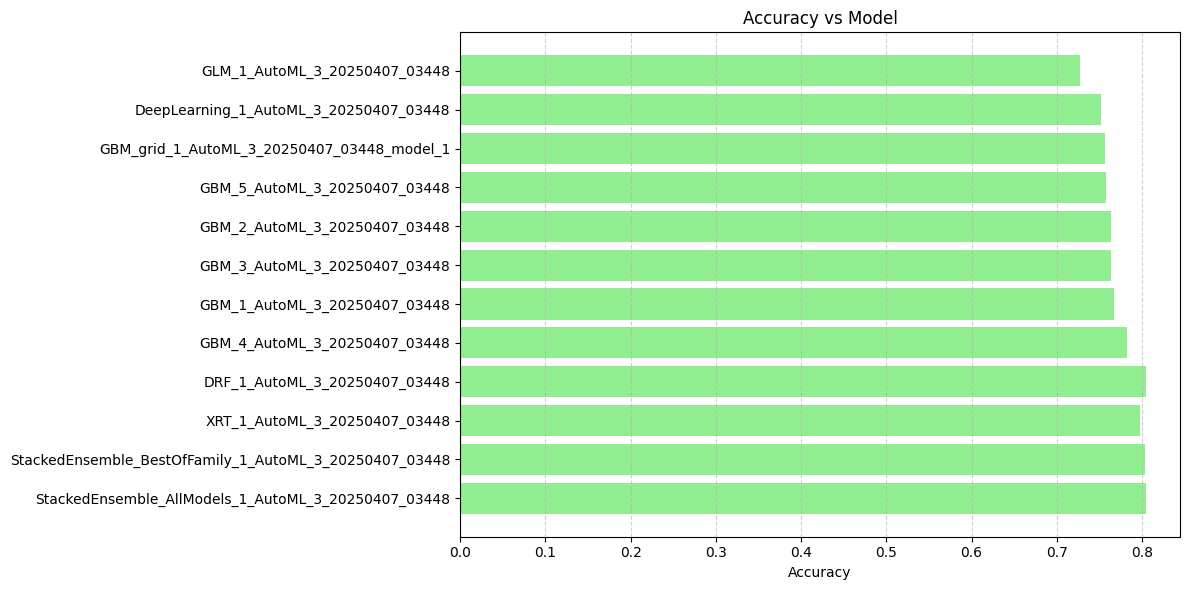

In [56]:
best_model = get_best_model_by_accuracy(aml, test_data=test, show_confusion_matrix=True)

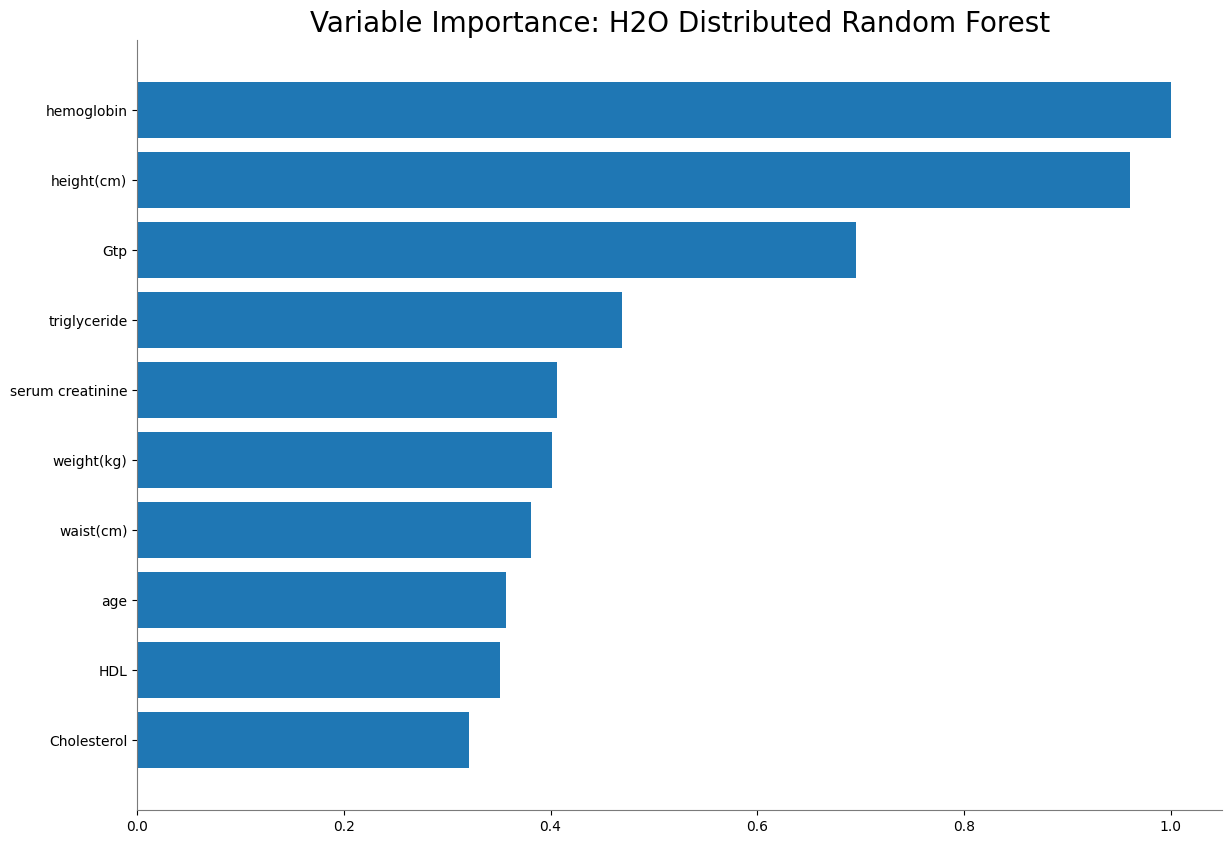

<Figure size 640x480 with 0 Axes>

In [59]:
# Важность признаков для лучшей модели
best_model.varimp_plot();

In [60]:
best_model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,hemoglobin,27952.361328,1.000000,0.132140
1,height(cm),26863.851562,0.961058,0.126995
2,Gtp,19445.750000,0.695675,0.091927
3,triglyceride,13100.042969,0.468656,0.061928
4,serum creatinine,11346.081055,0.405908,0.053637
5,weight(kg),11231.253906,0.401800,0.053094
6,waist(cm),10663.567383,0.381491,0.050410
7,age,9974.213867,0.356829,0.047151
8,HDL,9822.393555,0.351398,0.046434
9,Cholesterol,8986.871094,0.321507,0.042484


In [61]:
model_path = "best_model_h2o"
# Сохраняем модель
model_save = save_model(model=best_model, path=model_path, force=True)

print(f"Модель сохранена в: {model_save}")

Модель сохранена в: C:\Innopolis\Project_Module_2\Innopolis_Projects\Module_3_Classic_ML\Homework_29\best_model_h2o\DRF_1_AutoML_3_20250407_03448


## Общий вывод

Метрики у `H2O AutoML` получились немного выше, чем при классическом расчете у `XGBClassifier`. 

Важность признаков схожа для моделей, но для `XGBClassifier` важным является *height(cm)*, а для модели H2O - *hemoglobin*.

Значения Precision и Recall для H2O = 1, для XGB = 0.8.

Значения F1 для H2O = 0.75, для XGB = 0.8.

Значения AUC для H2O = 0.88, для XGB = 0.88.